In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
heart_df=pd.read_csv("data.csv")
heart_df.head()


,Angle1,Angle2,Angle3,Angle4,Target
0,30.1,38.4,3.5,1.6,1
1,30.8,35.8,3.5,1.8,1
2,30.9,35.6,3.4,1.8,1
3,31.7,37.2,3.5,1.8,1
4,32.1,38.3,3.5,1.6,1


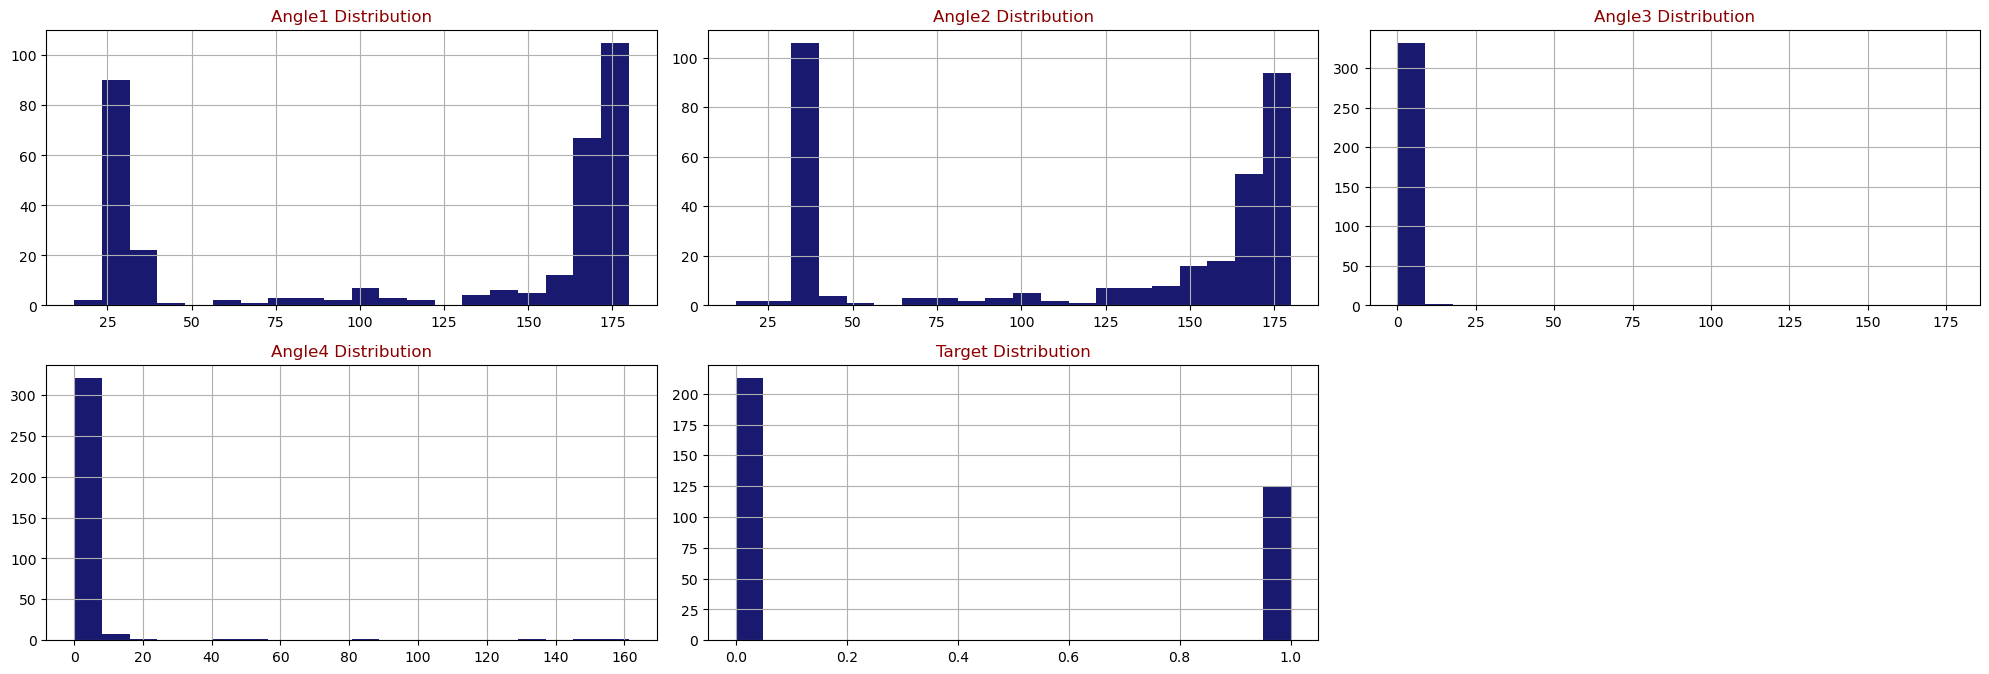

In [3]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

<AxesSubplot:xlabel='Target', ylabel='count'>

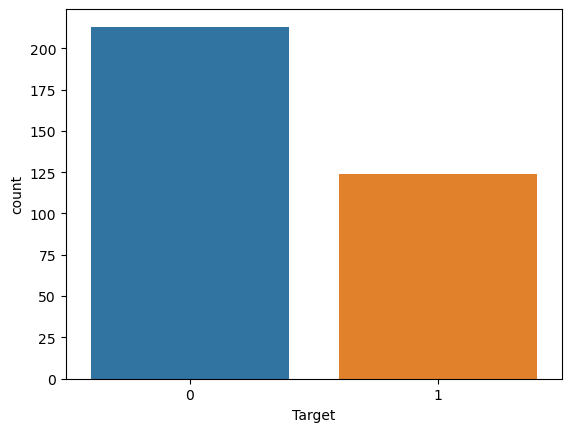

In [4]:
sn.countplot(x='Target',data=heart_df)


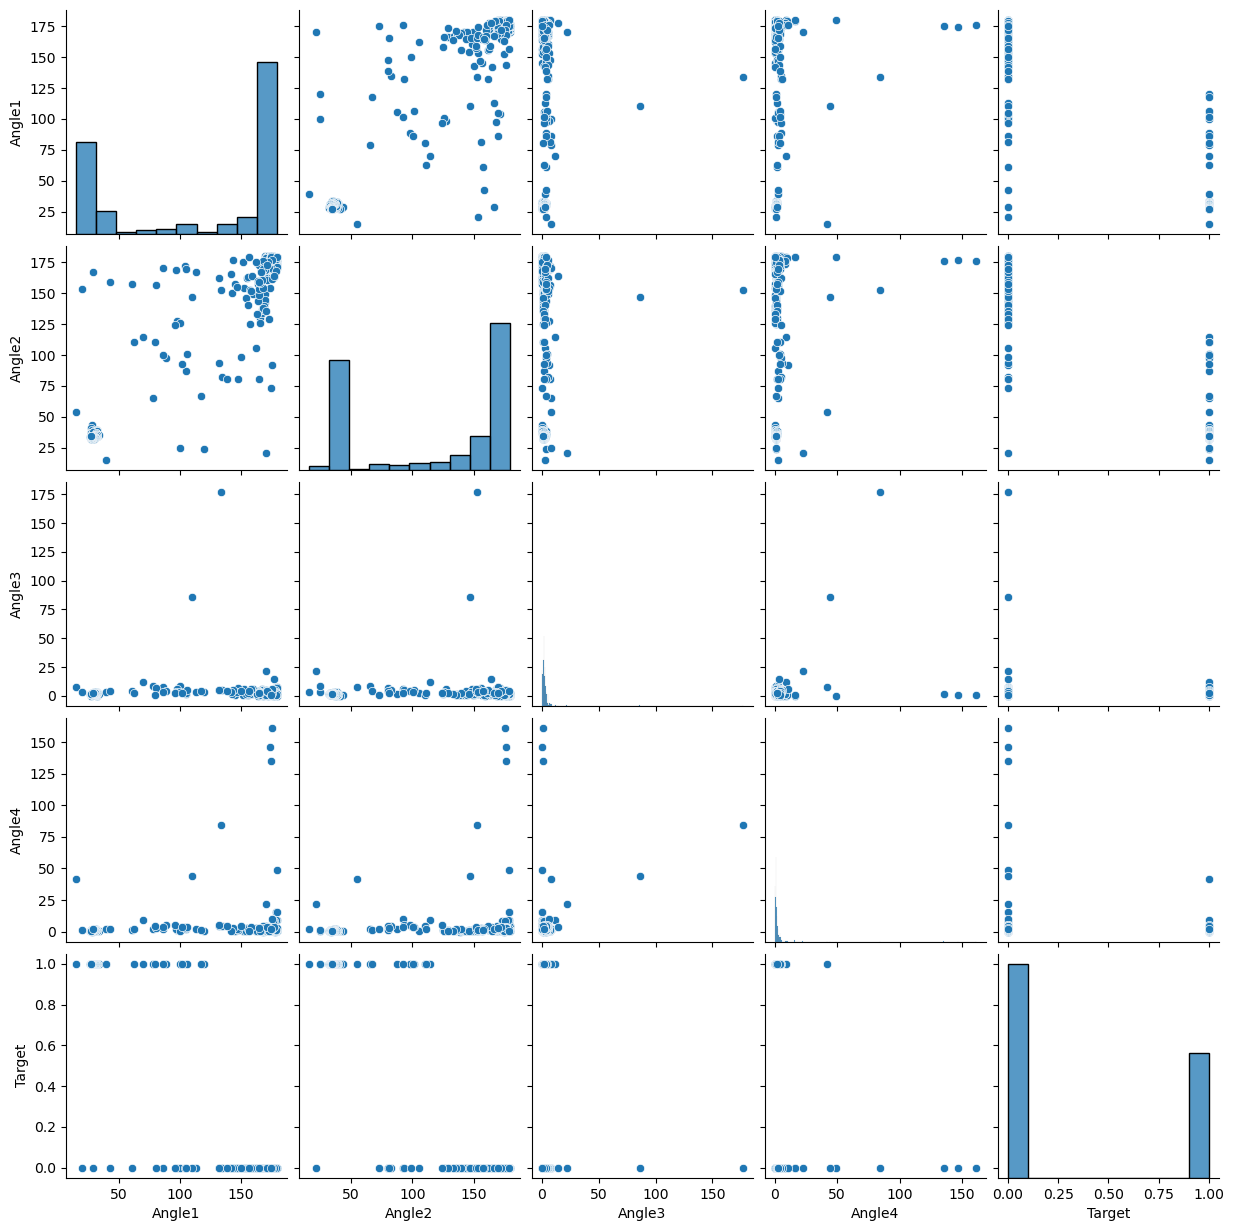

In [5]:
sn.pairplot(data=heart_df)


In [6]:
heart_df.describe()


,Angle1,Angle2,Angle3,Angle4,Target
count,337.000000,337.000000,337.000000,337.000000,337.000000
mean,116.983086,117.477448,3.003561,3.505935,0.367953
std,66.223819,62.834236,10.745511,15.167912,0.482965
min,15.100000,15.400000,0.000000,0.000000,0.000000
25%,31.200000,36.500000,1.100000,0.600000,0.000000
50%,164.800000,153.700000,1.700000,1.000000,0.000000
75%,173.100000,172.500000,2.700000,1.800000,1.000000
max,179.900000,179.800000,177.000000,161.300000,1.000000


In [7]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()


,const,Angle1,Angle2,Angle3,Angle4,Target
0,1.0,30.1,38.4,3.5,1.6,1
1,1.0,30.8,35.8,3.5,1.8,1
2,1.0,30.9,35.6,3.4,1.8,1
3,1.0,31.7,37.2,3.5,1.8,1
4,1.0,32.1,38.3,3.5,1.6,1


In [14]:
import sklearn
X = heart_df.iloc[:, :-1]  # select all columns except the last one as features
y = heart_df.iloc[:, -1]   # select the last column as the target variable


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [17]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [18]:
sklearn.metrics.accuracy_score(y_test,y_pred)


0.9852941176470589

<AxesSubplot:>

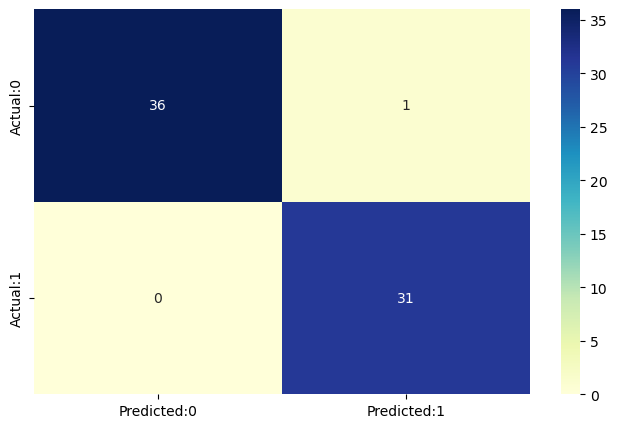

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")